# Input-output properties cells

In [1]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# CircuitPath = 'O1_data_physiology/' # edges files not inclued in https://github.com/FernandoSBorges/NetPyNE_SONATA/tree/main/SCx_model/O1_data_physiology

CircuitPath = '/home/fernando/Dropbox/SUNY/2025/TACS/SCx_model/O1_data_physiology/'
Atlas = CircuitPath + 'atlas/'
Atlas2 = 'O1_data_physiology/voxel_atlas_data/'
MorphologyPath = CircuitPath + 'morphologies/ascii/'
nrnPath = CircuitPath + 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical/edges.h5'
CellLibraryFile = CircuitPath + 'S1nonbarrel_neurons/nodes.h5'
METypePath = CircuitPath + 'emodels_hoc/'

lst_properties = [ 'etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'population', 'region', 'synapse_class', '@dynamics:holding_current', 
                  '@dynamics:input_resistance', '@dynamics:resting_potential', '@dynamics:threshold_current', 'x', 'y', 'z']

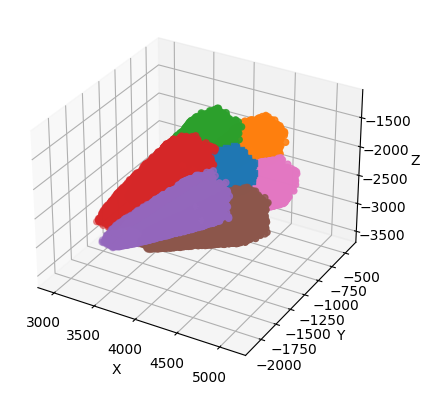

In [3]:
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)

cells = circuit.nodes["S1nonbarrel_neurons"]
proj_cells = circuit.nodes["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]
cells_projections = proj_cells
nodesinfo = cells.get()
nodesinfo_projections = cells_projections.get()

In [4]:
nodesinfo[nodesinfo['layer'] == '4'].keys()

Index(['etype', 'exc_mini_frequency', 'hexagon', 'inh_mini_frequency', 'layer',
       'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology',
       'mtype', 'orientation_w', 'orientation_x', 'orientation_y',
       'orientation_z', 'region', 'synapse_class', 'x', 'x_new', 'y', 'y_new',
       'z', 'z_new', '@dynamics:holding_current', '@dynamics:input_resistance',
       '@dynamics:resting_potential', '@dynamics:threshold_current'],
      dtype='object')

In [5]:
nodesinfo[nodesinfo['layer'] == '4'].head()

,etype,exc_mini_frequency,hexagon,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,...,x,x_new,y,y_new,z,z_new,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current
node_ids,,,,,,,,,,,,,,,,,,,,,
108727,dSTUT,0.010108,2,0.233243,4,dSTUT_L4BP_L4_BP_4_C300797C-I1_-_Scale_x1.000_...,hoc:dSTUT_L4BP,biophysical,INT,C300797C-I1_-_Scale_x1.000_y0.975_z1.000_-_Clo...,...,3918.383222,345.100991,-882.079924,368.523207,-1946.094942,1431.980963,-0.048744,103.355850,-77.048584,0.092756
108728,bAC,0.010108,1,0.233243,4,bAC_L23BTC_L4_BP_4_rp140319_ChC_3_idA_-_Scale_...,hoc:bAC_L23BTC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y0.975_z1.00...,...,4140.810336,179.239589,-766.305463,605.707003,-2090.662966,1435.342921,-0.011682,606.258118,-76.392754,0.024155
108729,cNAC,0.010108,0,0.233243,4,cNAC_L6NGC_L4_BP_4_C300797C-I1_-_Scale_x1.000_...,hoc:cNAC_L6NGC,biophysical,INT,C300797C-I1_-_Scale_x1.000_y0.950_z1.000_-_Clo...,...,3953.899058,722.166787,-1279.341226,593.262166,-2143.970161,1357.507449,-0.025396,385.013672,-74.105980,0.033770
108730,cACint,0.010108,0,0.233243,4,cACint_L4CHC_L4_BP_4_rp140319_ChC_3_idA_-_Scal...,hoc:cACint_L4CHC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y0.975_z1.00...,...,4214.386218,740.411420,-1362.666051,842.778874,-2201.251811,1481.951494,-0.014442,636.180054,-73.075333,0.015156
108731,cACint,0.010108,0,0.233243,4,cACint_L4CHC_L4_BP_4_rp140319_ChC_3_idA_-_Scal...,hoc:cACint_L4CHC,biophysical,INT,rp140319_ChC_3_idA_-_Scale_x1.000_y1.025_z1.00...,...,4184.420803,714.604811,-1328.656268,916.399225,-2366.952165,1328.898361,-0.014949,620.984924,-72.957344,0.015535


In [6]:
# !nrnivmodl '/home/fernando/Dropbox/SUNY/2025/TACS/SCx_model/O1_data_physiology/mod/'

In [7]:
def distance3D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2)+np.power(nodesinfo['z'][gidpre]-nodesinfo['z'][gidpost],2))

def distance2D(gidpre,gidpost):
    return np.sqrt(np.power(nodesinfo['x'][gidpre]-nodesinfo['x'][gidpost],2)+np.power(nodesinfo['y'][gidpre]-nodesinfo['y'][gidpost],2))

def distance2Dmean(gidpre, mean_x, mean_y):
    return np.sqrt(np.power(nodesinfo['x_new'][gidpre]-mean_x,2)+np.power(nodesinfo['y_new'][gidpre]-mean_y,2))

In [8]:
print(cells.property_values(Cell.REGION))

mtypes = sorted(cells.property_values(Cell.MTYPE))

i = 0
mntypes = {}
for mn in sorted(mtypes):
    mntypes[mn] = i
    i+=1

{'S1FL', 'S1J', 'S1DZ'}


## Select nodes to simulate

In [22]:
f = open('node_sets.json') 
node_sets = json.load(f) 

mean_x, mean_y = np.mean(nodesinfo['x_new']), np.mean(nodesinfo['y_new'])
node_gid = [] 
nodepremtype_new = []    
mtype_new = []     


node_gid = []
hoclist = []
Morpholist = []
node_threshold_current = []
node_holding_current = []


hex = 'hex0'
for gid in node_sets['hex0']['node_id']: 
# for gid in [117619, 142340, 142768, 142891, 141786,138337, 142077, 138315, 141829, 142671, 142352, 138475, 141536, 142859, 142058, 142814]: 
# for gid in [141766, 138220, 108767, 108729, 108749, 138433, 141757, 141803, 138337]: 
    if 'L4_' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 0.0 and distance2Dmean(gid, mean_x, mean_y) < 15.0 and 'EXC' in nodesinfo['synapse_class'][gid]:  
        nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
        if nodesinfo['mtype'][gid] not in mtype_new:
            mtype_new.append(nodesinfo['mtype'][gid])

        print(len(node_gid),gid,nodesinfo['synapse_class'][gid],nodesinfo['mtype'][gid],nodesinfo['model_template'][gid],nodesinfo['morphology'][gid],hex,distance2Dmean(gid, mean_x, mean_y))



        current1 = cells.get(gid,['@dynamics:threshold_current']).values[0]
        holding_current1 = cells.get(gid,['@dynamics:holding_current']).values[0]
        # print("%d %.5f %.5f" % (gid,current1,holding_current1))


        node_gid.append(gid)
        hoclist.append(nodesinfo['model_template'][gid][4:])
        Morpholist.append(nodesinfo['morphology'][gid])
        node_threshold_current.append(current1)
        node_holding_current.append(holding_current1)

            

# non central col
# for hex in node_sets['hex_O1']:
#     for gid in node_sets[hex]['node_id']:     
#         if 'L4' in nodesinfo['mtype'][gid] and distance2Dmean(gid, mean_x, mean_y) > 500.0 and distance2Dmean(gid, mean_x, mean_y) < 502.0:  
#             node_gid.append(gid)
#             nodepremtype_new.append(mntypes[nodesinfo['mtype'][gid]])
#             if nodesinfo['mtype'][gid] not in mtype_new:
#                 mtype_new.append(nodesinfo['mtype'][gid])

#             print(len(node_gid),gid,nodesinfo['mtype'][gid],hex,distance2Dmean(gid, mean_x, mean_y))        

0 109126 EXC L4_UPC hoc:cADpyr_L4TPC dend-C180997A-P3_axon-C031097B-P3 hex0 7.651331885081482
1 109632 EXC L4_UPC hoc:cADpyr_L4TPC dend-rp120608_P_3_idB_axon-vd110125B_INT_idA_-_Scale_x1.000_y1.050_z1.000 hex0 13.417897335385158
2 112531 EXC L4_UPC hoc:cADpyr_L4UPC dend-vd110125B_INT_idA_axon-rp120722_L4-1_idF_-_Scale_x1.000_y1.025_z1.000_-_Clone_0 hex0 13.071703743619349
3 114284 EXC L4_UPC hoc:cADpyr_L4UPC dend-rp120803_P_1_idB_axon-C031097B-P3_-_Scale_x1.000_y0.975_z1.000_-_Clone_0 hex0 3.667746548555403
4 114352 EXC L4_UPC hoc:cADpyr_L4UPC dend-mtC070301C_idB_axon-C180997A-P3_-_Scale_x1.000_y1.050_z1.000_-_Clone_0 hex0 13.017223842240734
5 115007 EXC L4_UPC hoc:cADpyr_L4UPC dend-C170898A-P4_axon-C031097B-P3_-_Scale_x1.000_y0.950_z1.000_-_Clone_0 hex0 0.9574206954055032
6 116011 EXC L4_UPC hoc:cADpyr_L4TPC dend-rp120521_P_1_idB_axon-rp120723_L4-2_idA_-_Scale_x1.000_y1.025_z1.000 hex0 11.099459107338411
7 117199 EXC L4_UPC hoc:cADpyr_L4TPC dend-rat_20160908_E3_LH2_cell3_axon-rp120608

In [23]:
mtype_new

['L4_UPC', 'L4_TPC', 'L4_SSC']

In [24]:
len(node_gid)
# hoclist = []
# Morpholist = []
# node_threshold_current = []
# node_holding_current = []

22

# Exploring the Lists

In [25]:
hoclist = sorted(cells.property_values(Cell.MODEL_TEMPLATE))
Morpholist = sorted(cells.property_values(Cell.MORPHOLOGY))
Mtypelist = sorted(cells.property_values(Cell.MTYPE))
Mtypelist[0:3], hoclist[0:3], Morpholist[0:3]

(['L1_DAC', 'L1_HAC', 'L1_LAC'],
 ['hoc:bAC_L23BTC', 'hoc:bAC_L6BTC', 'hoc:bIR_L23BP'],
 ['C010306C', 'C010306C_-_Clone_0', 'C010306C_-_Clone_1'])

# NetPyNE

In [26]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [27]:
cellName_list = {}
cellName_list2 = []
gid_list = {}

    # if cellName not in cellName_list2:

cellName_list2 = []

for gid in node_gid:

    cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]
        
    cellName_list2.append(cellName)
    
    cellName_list[gid] = cellName + '_' + str(len(cellName_list2)-1)
    gid_list[cellName + '_' + str(len(cellName_list2)-1)] = gid
    
    print('%s %s %s 1 1 %d' % (cellName + '_' + str(len(cellName_list2)-1),nodesinfo['mtype'][gid],nodesinfo['etype'][gid],gid))

L4_UPC_cADpyr_S1F_0 L4_UPC cADpyr 1 1 109126
L4_UPC_cADpyr_S1F_1 L4_UPC cADpyr 1 1 109632
L4_UPC_cADpyr_S1F_2 L4_UPC cADpyr 1 1 112531
L4_UPC_cADpyr_S1F_3 L4_UPC cADpyr 1 1 114284
L4_UPC_cADpyr_S1F_4 L4_UPC cADpyr 1 1 114352
L4_UPC_cADpyr_S1F_5 L4_UPC cADpyr 1 1 115007
L4_UPC_cADpyr_S1F_6 L4_UPC cADpyr 1 1 116011
L4_UPC_cADpyr_S1F_7 L4_UPC cADpyr 1 1 117199
L4_TPC_cADpyr_S1F_8 L4_TPC cADpyr 1 1 118008
L4_TPC_cADpyr_S1F_9 L4_TPC cADpyr 1 1 118551
L4_TPC_cADpyr_S1F_10 L4_TPC cADpyr 1 1 118903
L4_TPC_cADpyr_S1F_11 L4_TPC cADpyr 1 1 125451
L4_TPC_cADpyr_S1F_12 L4_TPC cADpyr 1 1 131862
L4_TPC_cADpyr_S1F_13 L4_TPC cADpyr 1 1 132504
L4_TPC_cADpyr_S1F_14 L4_TPC cADpyr 1 1 133289
L4_TPC_cADpyr_S1F_15 L4_TPC cADpyr 1 1 133293
L4_TPC_cADpyr_S1F_16 L4_TPC cADpyr 1 1 133426
L4_TPC_cADpyr_S1F_17 L4_TPC cADpyr 1 1 135956
L4_TPC_cADpyr_S1F_18 L4_TPC cADpyr 1 1 137858
L4_SSC_cADpyr_S1F_19 L4_SSC cADpyr 1 1 139754
L4_SSC_cADpyr_S1F_20 L4_SSC cADpyr 1 1 141213
L4_SSC_cADpyr_S1F_21 L4_SSC cADpyr 1 1 14136

In [15]:
gid_list

{'L4_BTC_cNAC_S1F_0': 141766,
 'L4_NBC_cNAC_S1F_1': 138220,
 'L4_BP_cNAC_S1F_2': 108767,
 'L4_BP_cNAC_S1F_3': 108729,
 'L4_BP_cNAC_S1F_4': 108749,
 'L4_NBC_cNAC_S1F_5': 138433,
 'L4_BTC_cNAC_S1F_6': 141757,
 'L4_MC_cNAC_S1F_7': 141803,
 'L4_NBC_cNAC_S1F_8': 138337}

In [16]:
cellsList = {}

for cellName in sorted(gid_list.keys()):
    # try:    
        gid = gid_list[cellName]

        MorphoName = nodesinfo['morphology'][gid] + '.asc'

        hocName = nodesinfo['model_template'][gid][4:]  

        MorphologyPath = '/home/fernando/Dropbox/SUNY/2025/TACS/SCx_model/O1_data_physiology/morphologies/ascii'
        
        # MorphoName = nodesinfo['morphology'][gid]+"_gid"+str(gid)+".asc"

        print(cellName,hocName)
            
        cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=True,
            conds={'cellType': cellName, 'cellModel': 'HH_full'},
            fileName='/home/fernando/Dropbox/SUNY/2025/TACS/SCx_model/O1_data_physiology/emodels_hoc/' + hocName + '.hoc',
            cellName=hocName,
            cellInstance = False,
            cellArgs=[gid, MorphologyPath, MorphoName])
        
        # netParams.saveCellParamsRule(label=cellName, fileName=cellName+'_BBP_cellParams.json')


        # netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra'] = 2.0*netParams.cellParams[cellName]['secs']['axon_0']['geom']['Ra']

        cellsList[cellName] = [{'x': nodesinfo['x'][gid], 'y': nodesinfo['y'][gid], 'z': nodesinfo['z'][gid]}]
        # cellsList[cellName] = [{'x': nodesinfo['x'][gid] - 3000.0, 'y': nodesinfo['y'][gid] + 2000.0, 'z': nodesinfo['z'][gid] + 3500.0}]

        cellMe = cellName

        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellMe]['secs']['soma_0']['geom']['pt3d'][-1]

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam'] = 1.0
        # netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L'] = 30.0

        axon_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                                    (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]



        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon_0_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_0']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam'] = 0.5
        # netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L'] = 30.0

        axon1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                                    (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)] 


                    
        myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, axon_1_pt3d_diam =  netParams.cellParams[cellMe]['secs']['axon_1']['geom']['pt3d'][-1]

        # netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam'] = 0.5
        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L'] = 100.0

        myelin_pt3d_diam =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['diam']
        myelin_pt3d_L =  netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['L']

        netParams.cellParams[cellMe]['secs']['myelin_0']['geom']['pt3d'] = [(myelin_pt3d_x, myelin_pt3d_y, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L/2.0, myelin_pt3d_z, myelin_pt3d_diam),
                                                                                    (myelin_pt3d_x, myelin_pt3d_y+myelin_pt3d_L, myelin_pt3d_z, myelin_pt3d_diam)] 

    # except:
    #     pass        

# cellsList

L4_BP_cNAC_S1F_2 cNAC_L6NGC
L4_BP_cNAC_S1F_3 cNAC_L6NGC
L4_BP_cNAC_S1F_4 cNAC_L6NGC
L4_BTC_cNAC_S1F_0 cNAC_L6NGC
L4_BTC_cNAC_S1F_6 cNAC_L6NGC
L4_MC_cNAC_S1F_7 cNAC_L6NGC
L4_NBC_cNAC_S1F_1 cNAC_L6NGC
L4_NBC_cNAC_S1F_5 cNAC_L6NGC
L4_NBC_cNAC_S1F_8 cNAC_L6NGC


In [17]:
# netParams.cellParams[cellName]
for cellName in netParams.cellParams.keys():    
    netParams.popParams[cellName] = {'cellType': cellName, 'cellsList': cellsList[cellName], 'cellModel': 'HH_full'}

In [18]:
netParams.popParams.keys()

odict_keys(['L4_BP_cNAC_S1F_2', 'L4_BP_cNAC_S1F_3', 'L4_BP_cNAC_S1F_4', 'L4_BTC_cNAC_S1F_0', 'L4_BTC_cNAC_S1F_6', 'L4_MC_cNAC_S1F_7', 'L4_NBC_cNAC_S1F_1', 'L4_NBC_cNAC_S1F_5', 'L4_NBC_cNAC_S1F_8'])

## Net info

In [19]:
print(list(circuit.nodes))
print(list(circuit.edges))

['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical']
['POm__S1nonbarrel_neurons__chemical', 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'VPM__S1nonbarrel_neurons__chemical', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical']


In [20]:
cells = circuit.nodes["S1nonbarrel_neurons"]
conn = circuit.edges["S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]

proj_cells = circuit.nodes["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]
proj_conn = circuit.edges["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"]
print(cells.size)
print(conn.size)
print(proj_cells.size)
print(proj_conn.size)

211712
406836913
549126
104319446


### Synaptic connectivity

The synaptic connectivity of the model is accessed using circ_extr.edges.
As an example, let's find out which neurons innervate an exemplary neuron

In [21]:
var_list_a = ['@source_node','@target_node','conductance','conductance_scale_factor','decay_time','delay','depression_time',
                'facilitation_time','n_rrp_vesicles','spine_length','syn_type_id','u_hill_coefficient','u_syn', 
                'afferent_section_id', 'afferent_section_type', 'afferent_segment_id','efferent_section_id', 'efferent_section_type', 'efferent_segment_id']
list_pre = []

for gid2 in node_gid:
# afferent edges of node_ids[gid2]
    sampled_edge_ids = conn.afferent_edges(gid2)
    
    var_list_a = sorted(conn.property_names)
    
    connsinfo = conn.get(sampled_edge_ids,var_list_a)
    
    unique, counts = np.unique(list(connsinfo['@source_node'].values), return_counts=True)
    # unique, counts 
    synNumber = dict(zip(unique, counts))
    # synNumber
    
    for gid in node_gid:
        try:
            print("gid =",gid, cellName_list[gid], "\t coonected with \t gid =",gid2,cellName_list[gid2],'\t with',synNumber[gid], 'connections',
                  list([netParams.cellParams[cellName_list[gid]]['secLists']['all'][isecN] for isecN in connsinfo.get(connsinfo['@source_node']==gid)['efferent_section_id'].values]),
                  list([netParams.cellParams[cellName_list[gid2]]['secLists']['all'][isecN] for isecN in connsinfo.get(connsinfo['@source_node']==gid)['afferent_section_id'].values]))


            synType = connsinfo.get(connsinfo['@source_node']==gid)['syn_type_id'].values[0]

            if synType > 99:

                print("EXC -> gid =",gid, cellName_list[gid],"synType =",synType)

                netParams.synMechParams[cellName_list[gid]+'->'+cellName_list[gid2]] = {'mod': 'ProbAMPANMDA_EMS',
                                            'Dep': connsinfo.get(connsinfo['@source_node']==gid)['depression_time'].values[0],
                                            'Fac': connsinfo.get(connsinfo['@source_node']==gid)['facilitation_time'].values[0],
                                            'Use': connsinfo.get(connsinfo['@source_node']==gid)['u_syn'].values[0]/connsinfo.get(connsinfo['@source_node']==gid)['u_hill_coefficient'].values[0],
                                            'tau_d_AMPA': connsinfo.get(connsinfo['@source_node']==gid)['decay_time'].values[0],
                                            'NMDA_ratio':0.8,
                                            # 'Nrrp':connsinfo.get(connsinfo['@source_node']==gid)['n_rrp_vesicles'].values[0],
                                            }            
            else:

                print("INH -> gid =",gid, cellName_list[gid],"synType =",synType)                

                netParams.synMechParams[cellName_list[gid]+'->'+cellName_list[gid2]] = {'mod': 'ProbGABAAB_EMS',
                                            'Dep': connsinfo.get(connsinfo['@source_node']==gid)['depression_time'].values[0],
                                            'Fac': connsinfo.get(connsinfo['@source_node']==gid)['facilitation_time'].values[0],
                                            'Use': connsinfo.get(connsinfo['@source_node']==gid)['u_syn'].values[0]/connsinfo.get(connsinfo['@source_node']==gid)['u_hill_coefficient'].values[0],
                                            'tau_d_GABAA': connsinfo.get(connsinfo['@source_node']==gid)['decay_time'].values[0],
                                            'GABAB_ratio':0.0,
                                            # 'Nrrp':connsinfo.get(connsinfo['@source_node']==gid)['n_rrp_vesicles'].values[0], # new ProbGABAAB_EMS.mod not working, using 2015 version without 'Nrrp'
                                            }
                
            print(netParams.synMechParams[cellName_list[gid]+'->'+cellName_list[gid2]])


            netParams.connParams[cellName_list[gid]+'->'+cellName_list[gid2]] = { 
                        'preConds': {'pop': cellName_list[gid]},
                        'postConds': {'pop': cellName_list[gid2]},
                        'connList': [[0,0] for ii in range(len(connsinfo.get(connsinfo['@source_node']==gid)))],
                        'sec': list([netParams.cellParams[cellName_list[gid2]]['secLists']['all'][isecN] for isecN in connsinfo.get(connsinfo['@source_node']==gid)['afferent_section_id'].values]),                  # target postsyn section
                        'synMech': cellName_list[gid]+'->'+cellName_list[gid2],              # target synaptic mechanism
                        'weight': list(1.0*connsinfo.get(connsinfo['@source_node']==gid)['conductance'].values*connsinfo.get(connsinfo['@source_node']==gid)['conductance_scale_factor'].values[0]),                 # synaptic weight 
                        'delay':list(connsinfo.get(connsinfo['@source_node']==gid)['delay'].values),                 # synaptic delay 
                        # 'loc':list(connsinfo.get(connsinfo['@source_node']==gid)['afferent_section_pos'].values), # error only to plotShape syn positions
                        }    
                
            print(netParams.connParams[cellName_list[gid]+'->'+cellName_list[gid2]]) 
            
            if gid not in list_pre:
                list_pre.append(gid)
                
            print(connsinfo.get(connsinfo['@source_node']==gid)['conductance'].values[0],connsinfo.get(connsinfo['@source_node']==gid)['conductance_scale_factor'].values[0],
                  connsinfo.get(connsinfo['@source_node']==gid)['u_syn'].values[0],connsinfo.get(connsinfo['@source_node']==gid)['u_hill_coefficient'].values[0],
                  connsinfo.get(connsinfo['@source_node']==gid)['depression_time'].values[0],connsinfo.get(connsinfo['@source_node']==gid)['facilitation_time'].values[0],
                  connsinfo.get(connsinfo['@source_node']==gid)['decay_time'].values[0],connsinfo.get(connsinfo['@source_node']==gid)['n_rrp_vesicles'].values[0],
                  )
            print()
        except:
            pass #print(gid,cellName_list[gid], "\tnot coonected with \t gid =",gid2,cellName_list[gid2])

gid = 138337 L4_NBC_cNAC_S1F_8 	 coonected with 	 gid = 141803 L4_MC_cNAC_S1F_7 	 with 2 connections ['soma_0', 'soma_0'] ['soma_0', 'soma_0']
INH -> gid = 138337 L4_NBC_cNAC_S1F_8 synType = 0
{'mod': 'ProbGABAAB_EMS', 'Dep': 397.961181640625, 'Fac': 17.475296020507812, 'Use': 0.12529987803439505, 'tau_d_GABAA': 8.291593551635742, 'GABAB_ratio': 0.0}
{'preConds': {'pop': 'L4_NBC_cNAC_S1F_8'}, 'postConds': {'pop': 'L4_MC_cNAC_S1F_7'}, 'connList': [[0, 0], [0, 0]], 'sec': ['soma_0', 'soma_0'], 'synMech': 'L4_NBC_cNAC_S1F_8->L4_MC_cNAC_S1F_7', 'weight': [0.0, 0.0], 'delay': [1.7906824, 0.9272397]}
1.575293779373169 0.0 0.24308176338672638 1.94 397.961181640625 17.475296020507812 8.291593551635742 1



In [22]:
var_list_a = ['@source_node','@target_node',
            #   'conductance','conductance_scale_factor','decay_time','delay','depression_time',
                # 'facilitation_time','n_rrp_vesicles','spine_length','syn_type_id','u_hill_coefficient','u_syn', 
                'afferent_section_id', 'afferent_section_type', 'afferent_segment_id','efferent_section_id', 'efferent_section_type', 'efferent_segment_id']

gid = 141655
gid2 = 138260
# afferent edges of node_ids[gid2]
sampled_edge_ids = conn.afferent_edges(gid2)    
# var_list_a = sorted(conn.property_names)[0:12]    
connsinfo = conn.get(sampled_edge_ids,var_list_a)
connsinfo.get(connsinfo['@source_node']==gid)

,@source_node,@target_node,afferent_section_id,afferent_section_type,afferent_segment_id,efferent_section_id,efferent_section_type,efferent_segment_id
221892569,141655,138260,550,3,0,0,0,0
221892570,141655,138260,550,3,0,0,0,0
221892571,141655,138260,556,3,0,0,0,0
221892572,141655,138260,550,3,0,0,0,0
221892573,141655,138260,549,3,0,0,0,0
221892574,141655,138260,555,3,0,0,0,0
221892575,141655,138260,566,3,0,0,0,0
221892576,141655,138260,550,3,0,0,0,0
221892577,141655,138260,549,3,0,0,0,0
221892578,141655,138260,571,3,0,0,0,0


In [23]:
list_pre

[138337]

In [24]:
for gid in node_gid: # list_pre:

    popName1 = cellName_list[gid]
    current1 = 2.5*cells.get(gid,['@dynamics:threshold_current']).values[0]
    holding_current1 = cells.get(gid,['@dynamics:holding_current']).values[0]

    current1 = 0.3
    holding_current1 = 0.0

    netParams.stimSourceParams['Input_'+str(gid)] = {'type': 'IClamp', 'del': 0.0, 'dur': 600.0, 'amp': holding_current1}
    netParams.stimSourceParams['Inputb_'+str(gid)] = {'type': 'IClamp', 'del': 300.0, 'dur': 600.0, 'amp':current1}

    netParams.stimTargetParams['Input->'+str(gid)] = {'source': 'Input_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}
    netParams.stimTargetParams['Inputb->'+str(gid)] = {'source': 'Inputb_'+str(gid), 'sec':'soma_0', 'loc': 0.5, 'conds': {'pop':popName1}}

In [25]:
#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 500.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
   
netParams.defaultThreshold = -20.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
    

In [26]:
#------------------------------------------------------------------------------
#
# SIMULATION CONFIGURATION
#
#------------------------------------------------------------------------------

cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration

cfg.coreneuron = False

#------------------------------------------------------------------------------
# Run parameters
#------------------------------------------------------------------------------
cfg.duration = 1.0*1e3 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 1000, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -84.0}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.1

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------
# cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'}}  ## Dict with traces to record  
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_1': {'sec':'axon_1', 'loc':0.5, 'var':'v'},
                    # 'V_myelin_0': {'sec':'myelin_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_15': {'sec':'axon_15', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_47': {'sec':'apic_47', 'loc':0.5, 'var':'v'},       
                    # 'V_apic_64': {'sec':'apic_64', 'loc':0.5, 'var':'v'},
                    # 'V_apic_86': {'sec':'apic_86', 'loc':0.5, 'var':'v'},           
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},       
                    # 'V_dend_15': {'sec':'dend_15', 'loc':0.5, 'var':'v'},
                    }
cfg.recordStim = False			
cfg.recordTime = False  		
cfg.recordStep = 0.025       

#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = 'v0_batch0'       #   + str(cfg.cynradNumber)
cfg.saveFolder = 'exploration/data/'+cfg.simLabel
# cfg.filename =                	## Set file output name
cfg.savePickle = False	        	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simData', 'simConfig', 'net', 'netParams'] ## ['simData'] ##  ['simData'] ##, , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			
cfg.saveCellConns = True	

#------------------------------------------------------------------------------
# Analysis and plotting 
# ------------------------------------------------------------------------------
# cfg.analysis['plotRaster'] = {'include': cfg.S1cells, 'saveFig': True, 'showFig': False,'orderInverse': True, 'timeRange': [0,cfg.duration], 'figSize': (24,8), 'fontSize':4, 'markerSize':4, 'marker': 'o', 'dpi': 300} 
# cfg.analysis['plot2Dnet']   = {'include': ['presyn_L23_PC_cAD','presyn_L5_TTPC2_cAD', 'presyn_VPM_sTC','L23_PC_cAD','L5_TTPC2_cAD'],'saveFig': True, 'showConns': False, 'figSize': (24,24), 'view': 'xz', 'fontSize':16}   # Plot 2D cells xy
# cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'ylim': [-100,50], 'saveFig': True, 'showFig': False, 'figSize':(24,24)}

cfg.analysis['plotTraces'] = {'include': [ii for ii in range(len(node_gid))], 'oneFigPer': 'trace', 'overlay': True, 'timeRange': [0,cfg.duration], 'saveFig': False, 'showFig': True, 'figSize':(24,4)} # , 'ylim': [-90,30] Plot recorded traces for this list of cells
# cfg.analysis['plotShape'] = {'includePre':  [ii for ii in range(10)],'includePre':  [ii for ii in range(10)], 'saveFig': True, 'showFig': True, 'figSize':(12,12)}

In [27]:
cfg.invertedYCoord = False

In [28]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations


Start time:  2025-03-14 16:44:35.970889


{L4_BP_cNAC_S1F_2: <netpyne.network.pop.Pop object at 0x70f71f3987f0>, L4_BP_cNAC_S1F_3: <netpyne.network.pop.Pop object at 0x70f71f3983d0>, L4_BP_cNAC_S1F_4: <netpyne.network.pop.Pop object at 0x70f71f398520>, L4_BTC_cNAC_S1F_0: <netpyne.network.pop.Pop object at 0x70f71f398580>, L4_BTC_cNAC_S1F_6: <netpyne.network.pop.Pop object at 0x70f71f3981c0>, L4_MC_cNAC_S1F_7: <netpyne.network.pop.Pop object at 0x70f71f398700>, L4_NBC_cNAC_S1F_1: <netpyne.network.pop.Pop object at 0x70f71f3f0820>, L4_NBC_cNAC_S1F_5: <netpyne.network.pop.Pop object at 0x70f71f3f0640>, L4_NBC_cNAC_S1F_8: <netpyne.network.pop.Pop object at 0x70f71f3f07f0>}

In [29]:
sim.net.createCells()              			# instantiate network cells based on defined populations


Creating network of 9 cell populations on 1 hosts...
  Number of cells on node 0: 9 
  Done; cell creation time = 0.13 s.


[compartCell_L4_BP_cNAC_S1F_2_HH_full_0,
 compartCell_L4_BP_cNAC_S1F_3_HH_full_1,
 compartCell_L4_BP_cNAC_S1F_4_HH_full_2,
 compartCell_L4_BTC_cNAC_S1F_0_HH_full_3,
 compartCell_L4_BTC_cNAC_S1F_6_HH_full_4,
 compartCell_L4_MC_cNAC_S1F_7_HH_full_5,
 compartCell_L4_NBC_cNAC_S1F_1_HH_full_6,
 compartCell_L4_NBC_cNAC_S1F_5_HH_full_7,
 compartCell_L4_NBC_cNAC_S1F_8_HH_full_8]

In [30]:
# sim.net.connectCells()            			# create connections between cells based on params

In [31]:
sim.net.addStims() 							# add network stimulation

Adding stims...
  Number of stims on node 0: 18 
  Done; cell stims creation time = 0.00 s.


[[{label: 'Input->108767', source: 'Input_108767', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 0.0, dur: 600.0, amp: 0.0, hObj: IClamp[4]},
  {label: 'Inputb->108767', source: 'Inputb_108767', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 300.0, dur: 600.0, amp: 0.3, hObj: IClamp[5]}],
 [{label: 'Input->108729', source: 'Input_108729', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 0.0, dur: 600.0, amp: 0.0, hObj: IClamp[6]},
  {label: 'Inputb->108729', source: 'Inputb_108729', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 300.0, dur: 600.0, amp: 0.3, hObj: IClamp[7]}],
 [{label: 'Input->108749', source: 'Input_108749', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 0.0, dur: 600.0, amp: 0.0, hObj: IClamp[8]},
  {label: 'Inputb->108749', source: 'Inputb_108749', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 300.0, dur: 600.0, amp: 0.3, hObj: IClamp[9]}],
 [{label: 'Input->141766', source: 'Input_141766', sec: 'soma_0', loc: 0.5, type: 'IClamp', del: 0.0, dur: 600.0, amp: 0.0, hObj: ICl

In [32]:
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)

Recording 9 traces of 1 types on node 0


{spkt: Vector[84807], spkid: Vector[84808], V_soma: {cell_0: Vector[84809], cell_1: Vector[84810], cell_2: Vector[84811], cell_3: Vector[84812], cell_4: Vector[84813], cell_5: Vector[84814], cell_6: Vector[84815], cell_7: Vector[84816], cell_8: Vector[84817]}, _repr_mimebundle_: {}}

In [33]:
sim.runSim()                      			# run parallel Neuron simulation  

0.0s

Running simulation using NEURON for 1000.0 ms...
0.1s
0.2s
0.3s
0.4s
0.5s
0.6s
0.7s
0.8s
0.9s
1.0s
  Done; run time = 18.87 s; real-time ratio: 0.05.


In [34]:
sim.gatherData();                  			# gather spiking data and cell info from each node


Gathering data...
  Done; gather time = 0.07 s.

Analyzing...
  Cells: 9
  Connections: 0 (0.00 per cell)
  Spikes: 484 (53.78 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 18.87 s
   L4_BP_cNAC_S1F_2 : 53.000 Hz
   L4_BP_cNAC_S1F_3 : 69.000 Hz
   L4_BP_cNAC_S1F_4 : 69.000 Hz
   L4_BTC_cNAC_S1F_0 : 52.000 Hz
   L4_BTC_cNAC_S1F_6 : 51.000 Hz
   L4_MC_cNAC_S1F_7 : 46.000 Hz
   L4_NBC_cNAC_S1F_1 : 47.000 Hz
   L4_NBC_cNAC_S1F_5 : 48.000 Hz
   L4_NBC_cNAC_S1F_8 : 49.000 Hz


In [35]:
# Calcular o firing rate
spk_times = sim.simData['spkt']  # Tempos de spikes
spk_ids = sim.simData['spkid']  # IDs dos neurônios

steps, rates = np.unique(spk_ids, return_counts=True)
steps, rates/0.6

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 array([ 88.33333333, 115.        , 115.        ,  86.66666667,
         85.        ,  76.66666667,  78.33333333,  80.        ,
         81.66666667]))

In [36]:
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
# sim.analysis.plotData()         			# plot spike raster etc

[]

In [37]:
# sim.analysis.plotSpikeStats(timeRange=[300,900], figSize=(18,6))

Preparing spike data...
Plotting raster...


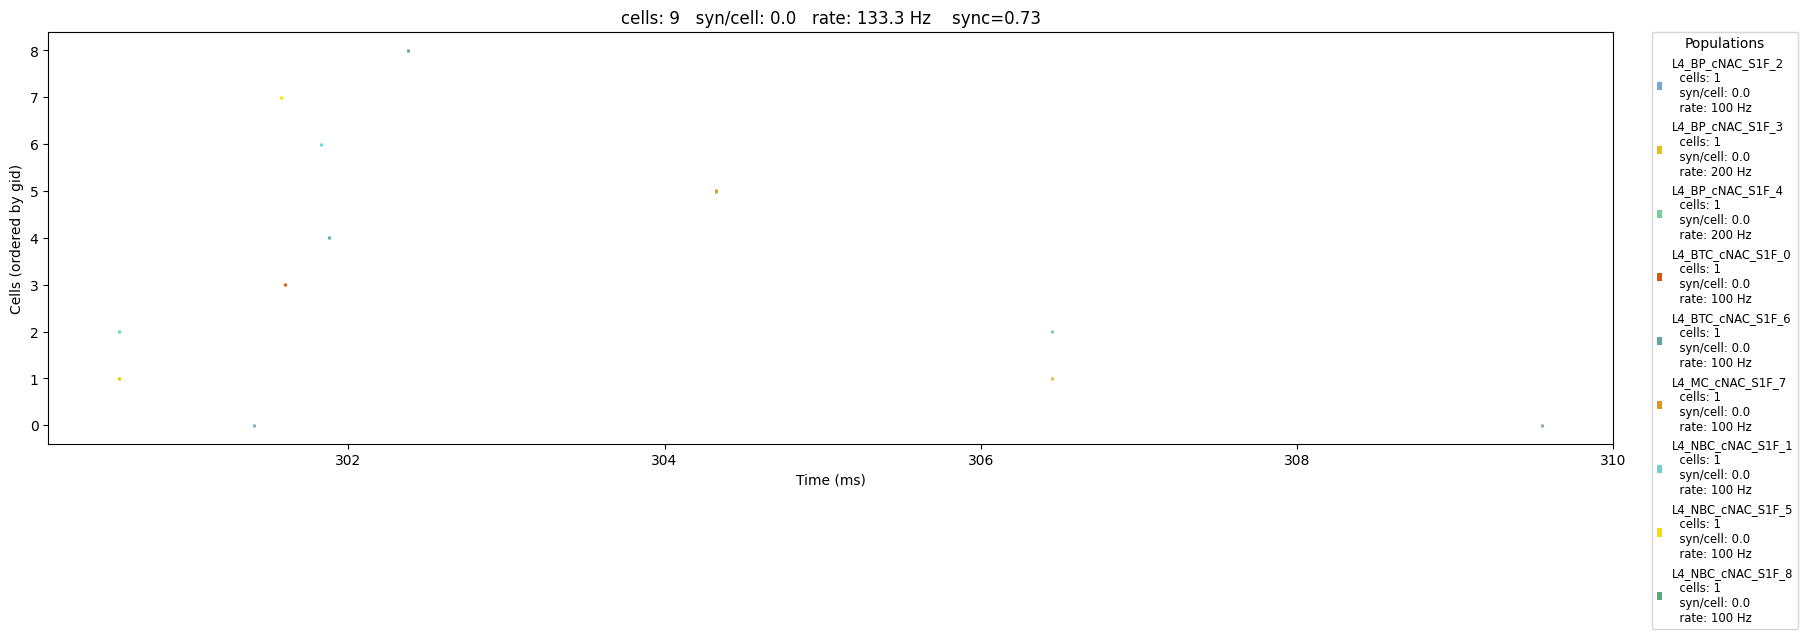

In [38]:
sim.analysis.plotRaster(timeRange=[300,310], figSize=(18,6), 
    popRates=True);

Preparing spike data...
Plotting raster...


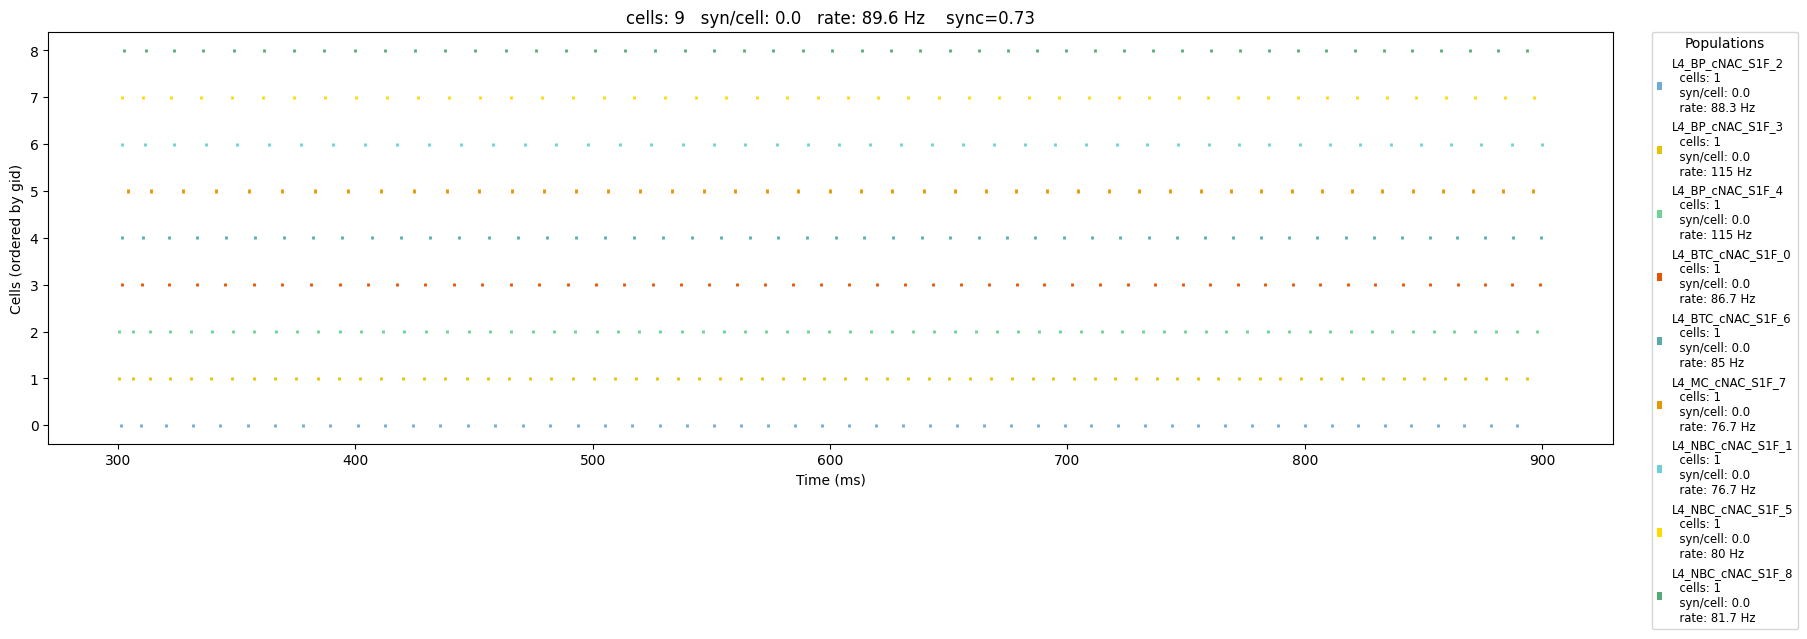

In [39]:
sim.analysis.plotRaster(timeRange=[300,900], figSize=(18,6),
    popRates=True);

Plotting recorded cell traces ... trace


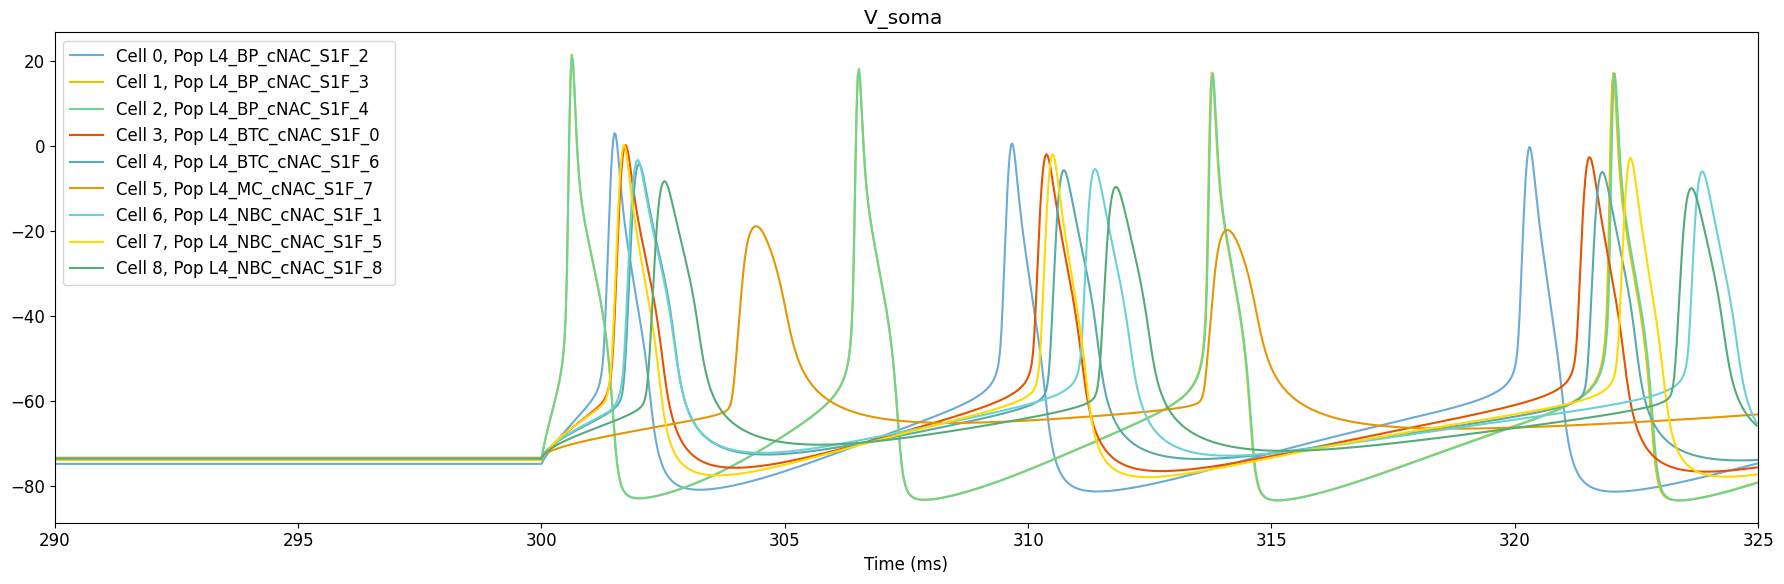

In [40]:
sim.analysis.plotTraces(timeRange=[290,325], overlay=True, oneFigPer='trace', figSize=(18,6));
# sim.analysis.plotTraces(timeRange=[290,320], overlay=False, oneFigPer='trace', figSize=(18,36));

Plotting recorded cell traces ... trace


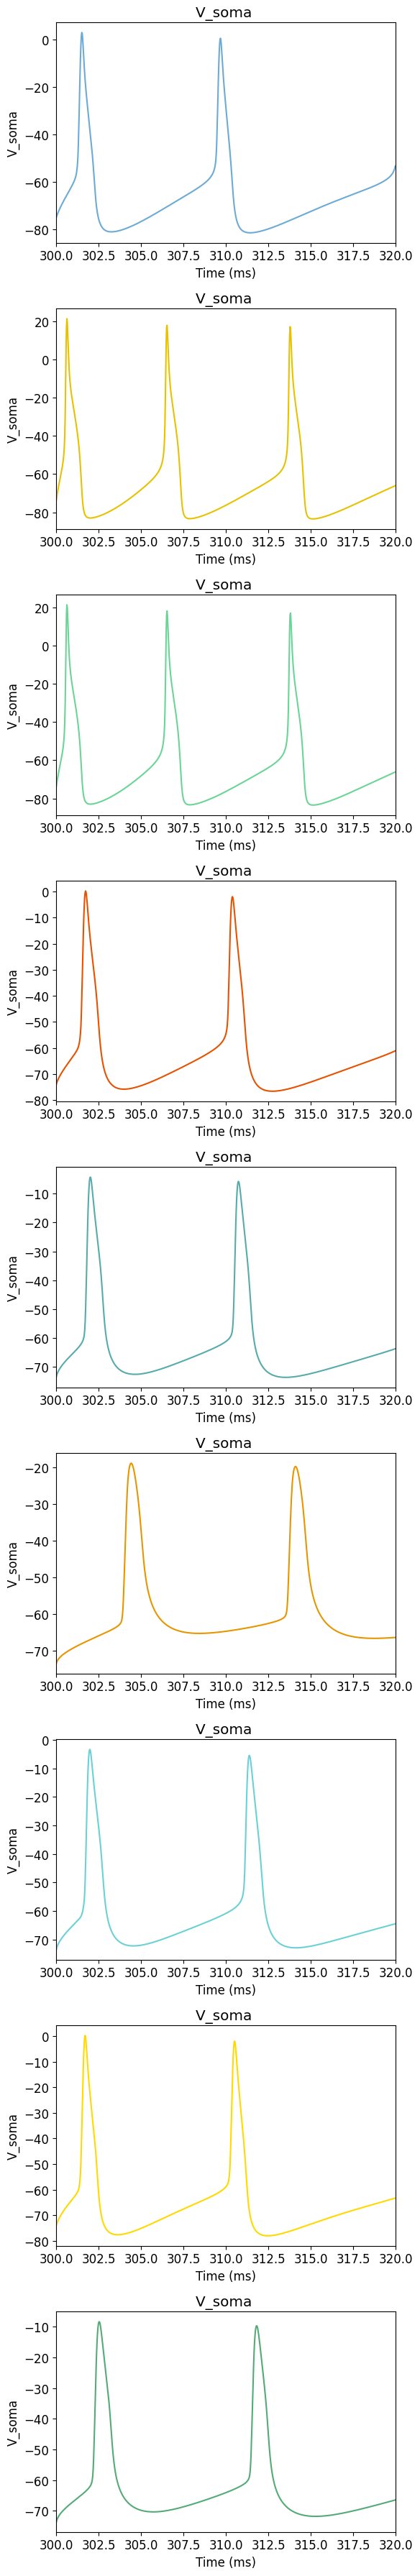

In [41]:
sim.analysis.plotTraces(timeRange=[300,320], overlay=False, oneFigPer='trace', figSize=(6,36));
# sim.analysis.plotTraces(timeRange=[250,1000], overlay=False, oneFigPer='trace', figSize=(18,36));

Plotting 2D representation of network cell locations and connections...


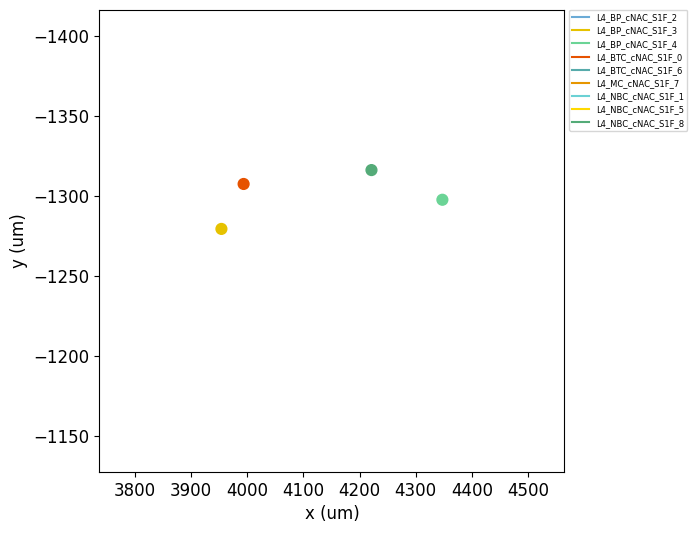

Plotting 2D representation of network cell locations and connections...


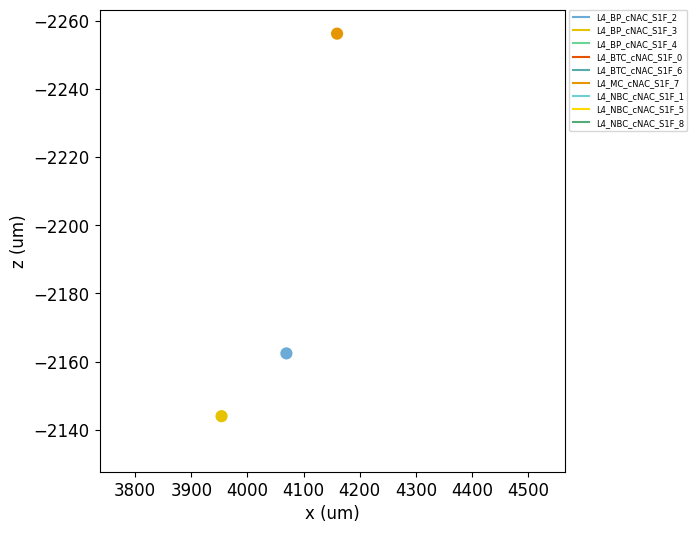

In [42]:
sim.analysis.plot2Dnet(showConns=True, figSize=(6, 6),fontSize=6);
sim.analysis.plot2Dnet(showConns=True, figSize=(6, 6),fontSize=6, view = 'xz');

Plotting 3D cell shape ...


(<Figure size 2600x2600 with 2 Axes>, {})

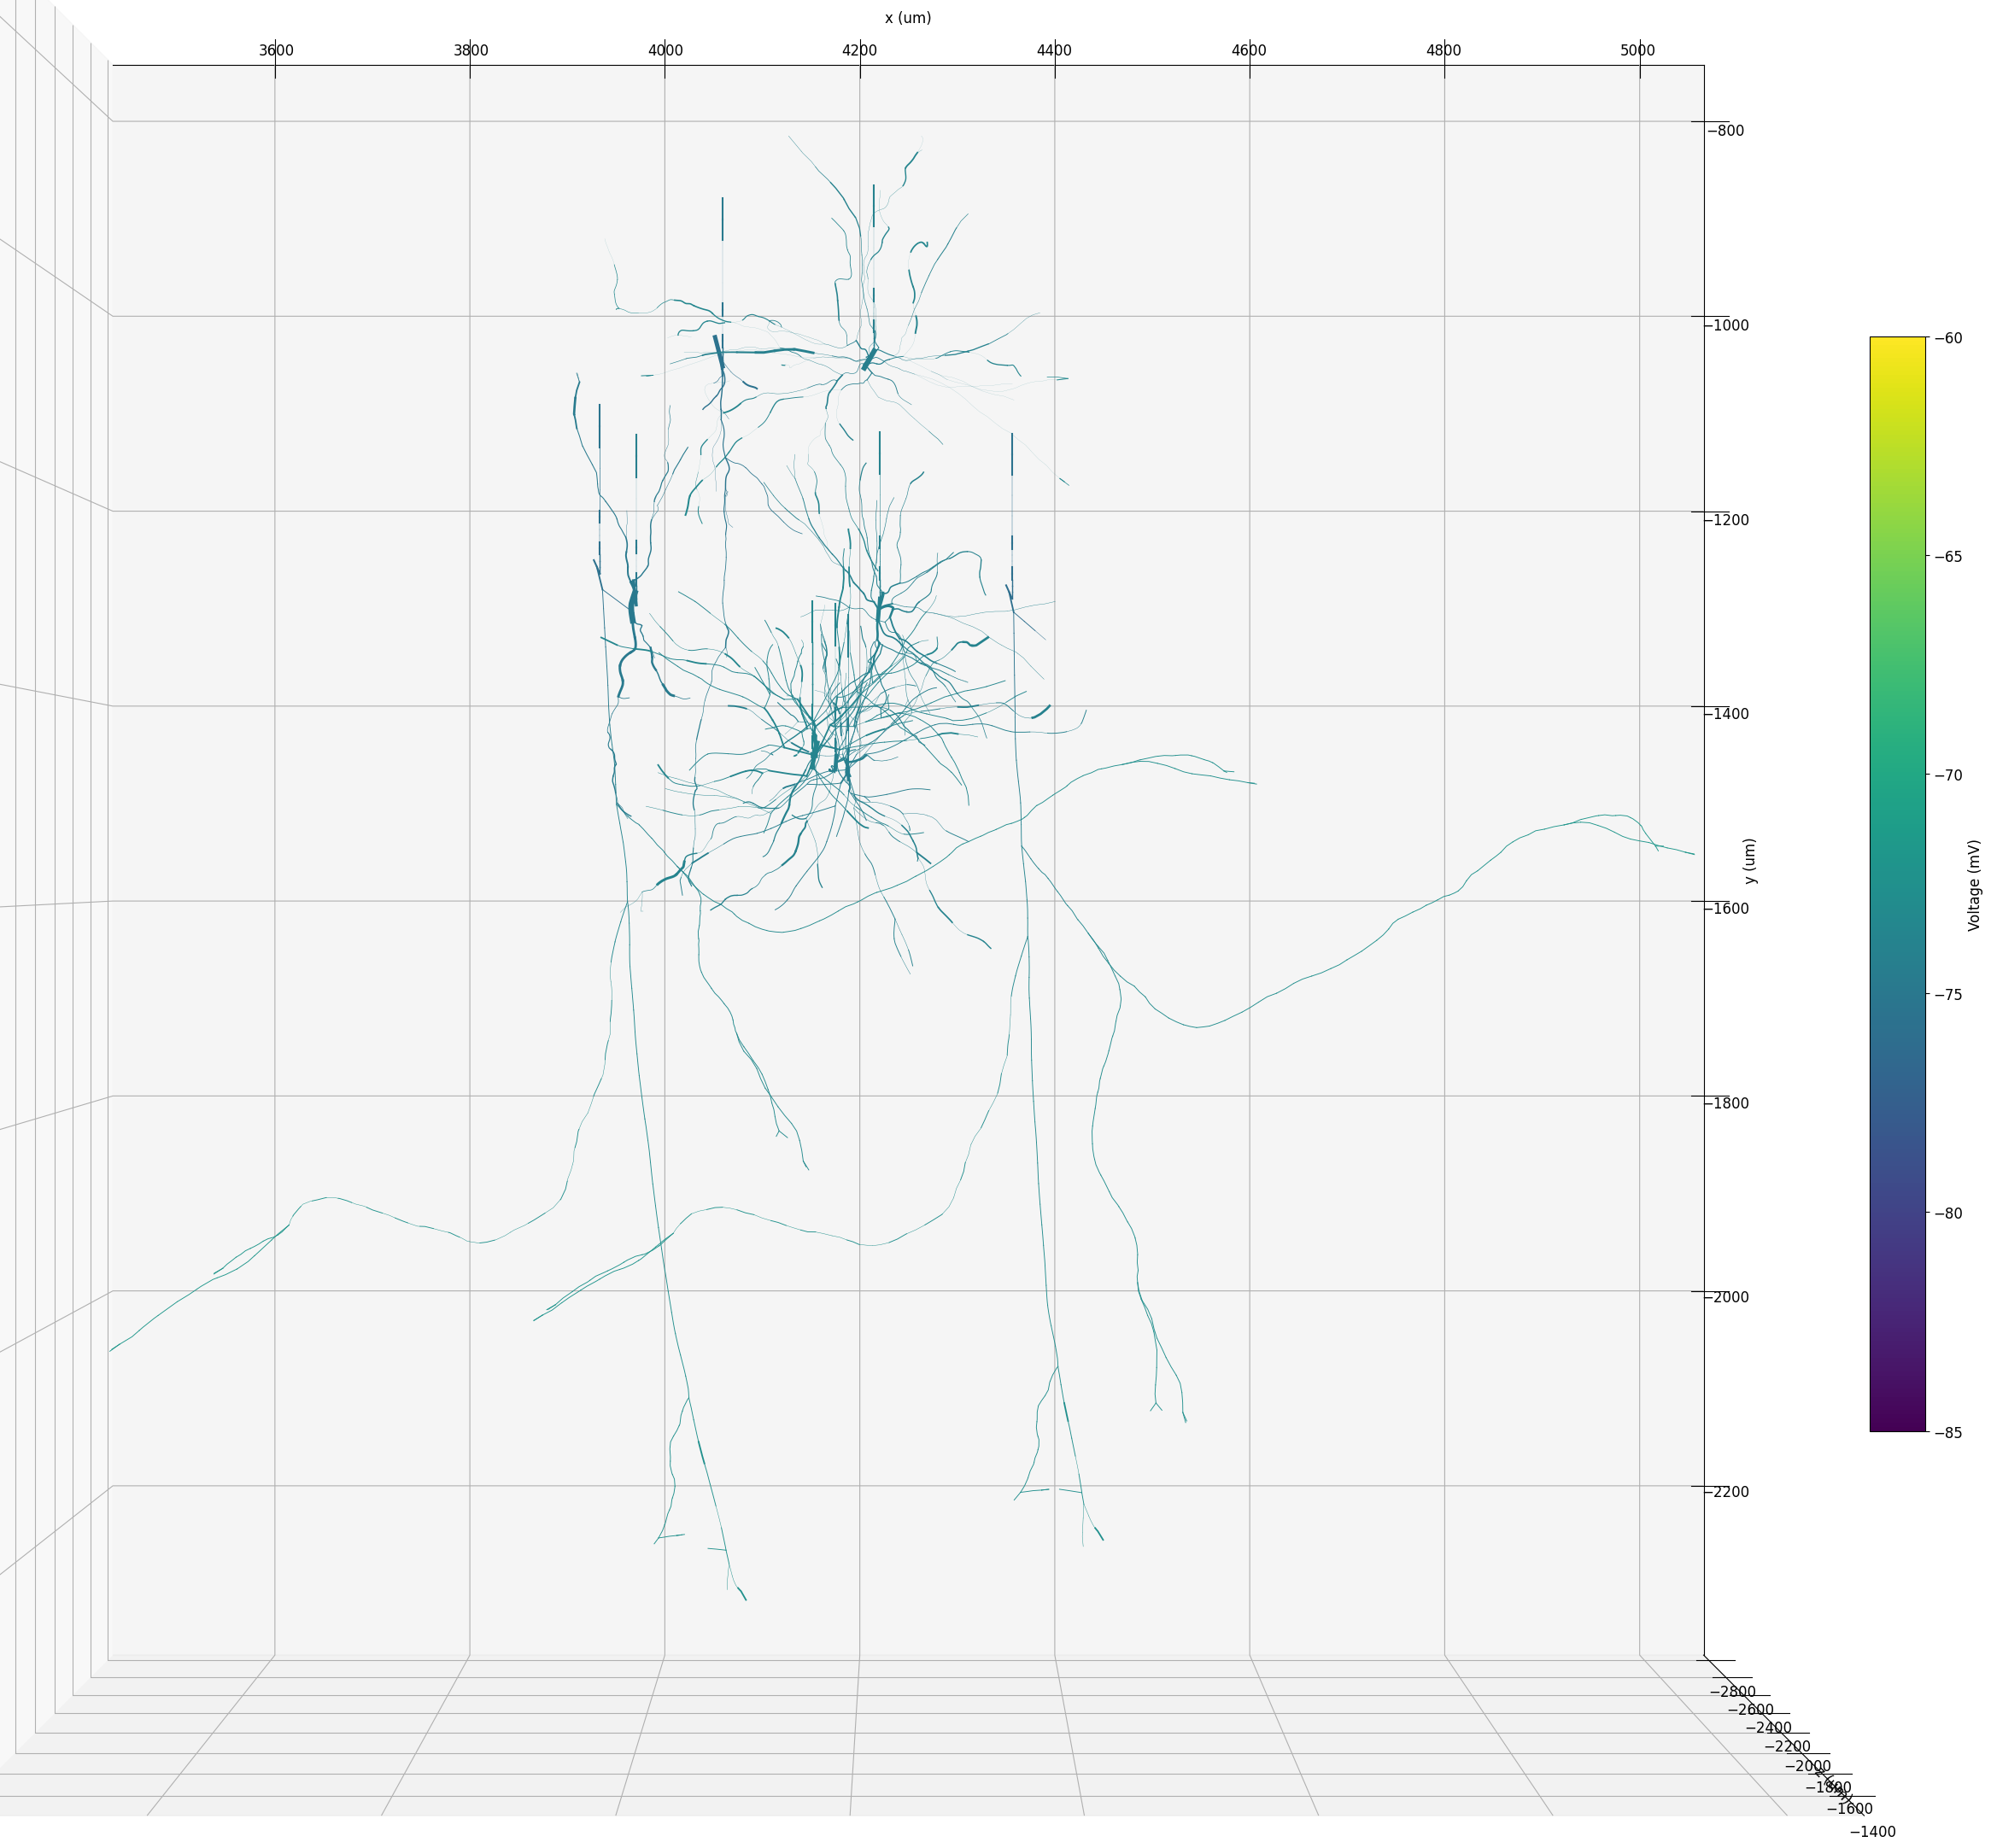

In [43]:
sim.analysis.plotShape(includePre= [ii for ii in range(len(node_gid))], includePost= [ii for ii in range(len(node_gid))], 
                       includeAxon=True, showSyns=True, showElectrodes=False,
    cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-85.0, -60.0], showFig=False, synSize=3, saveFig=False, figSize=(26,26))

Plotting 3D cell shape ...


(<Figure size 3600x3600 with 2 Axes>, {})

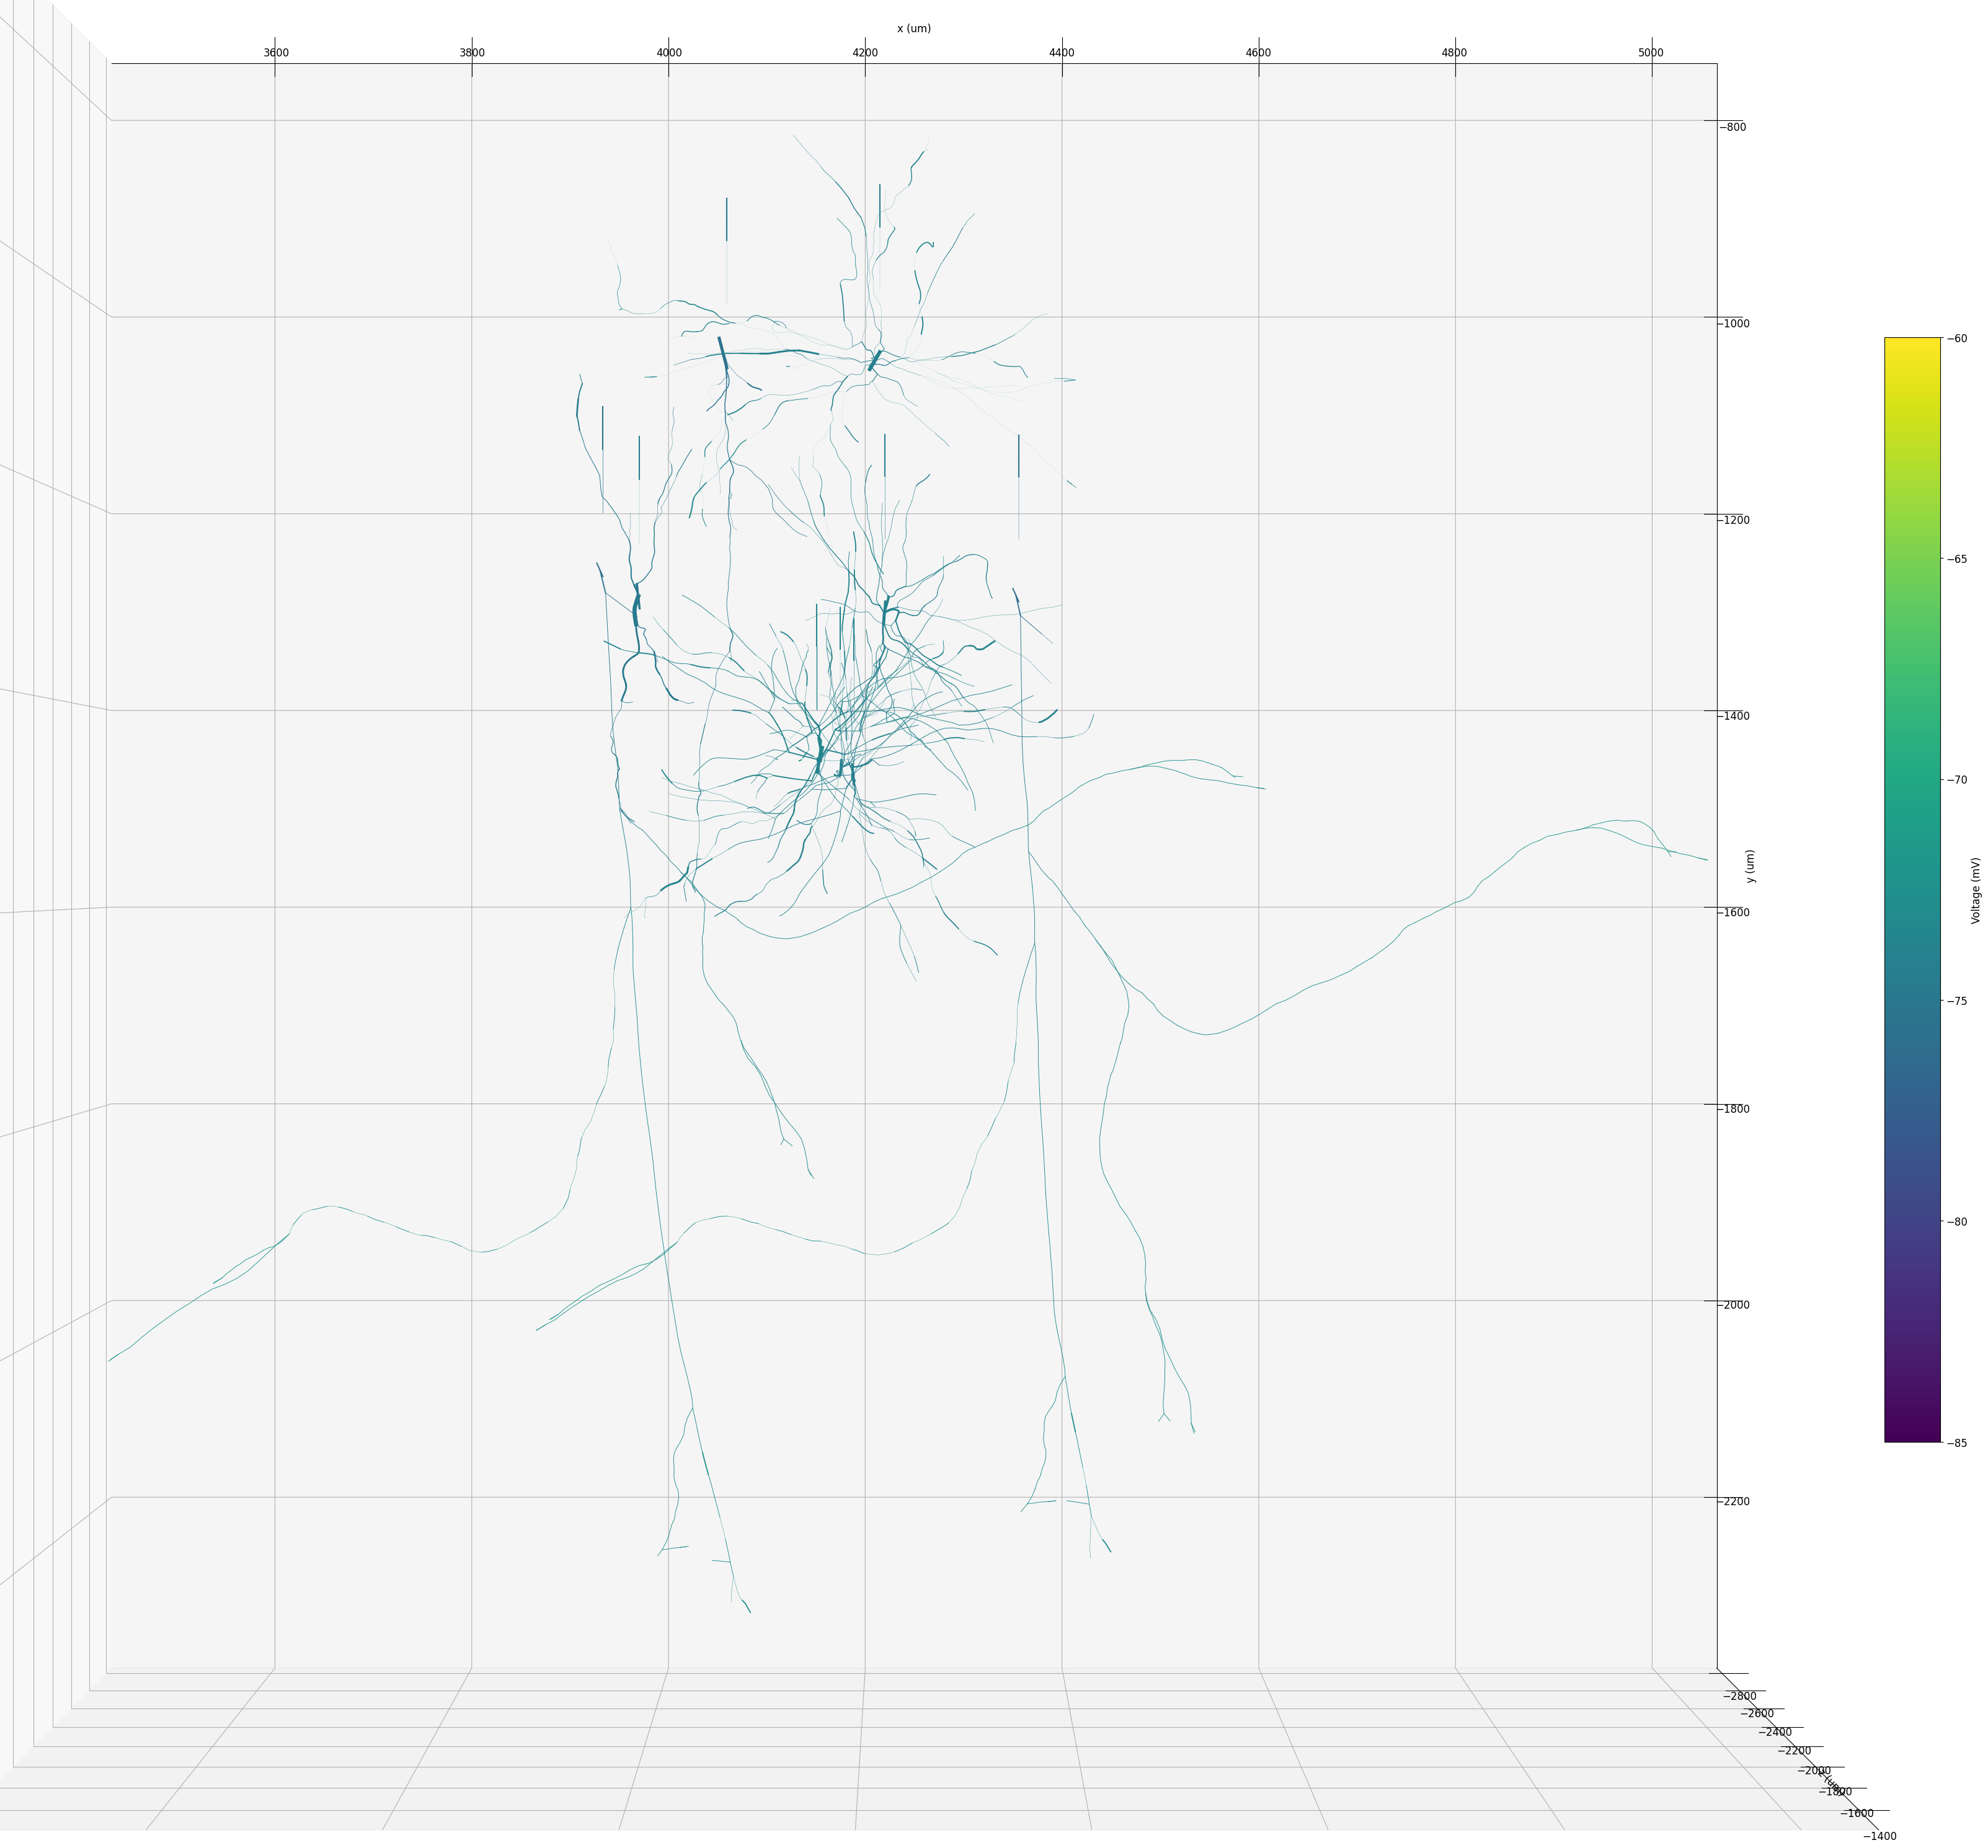

In [44]:
sim.analysis.plotShape(includePre= [ii for ii in range(len(node_gid))], includePost= [ii for ii in range(len(node_gid))], 
                       includeAxon=False, showSyns=True, showElectrodes=False,
    cvar= 'voltage', dist=0.6, elev=90, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-85.0, -60.0], showFig=False, synSize=2, saveFig=False, figSize=(36,36))

Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...
Plotting 3D cell shape ...


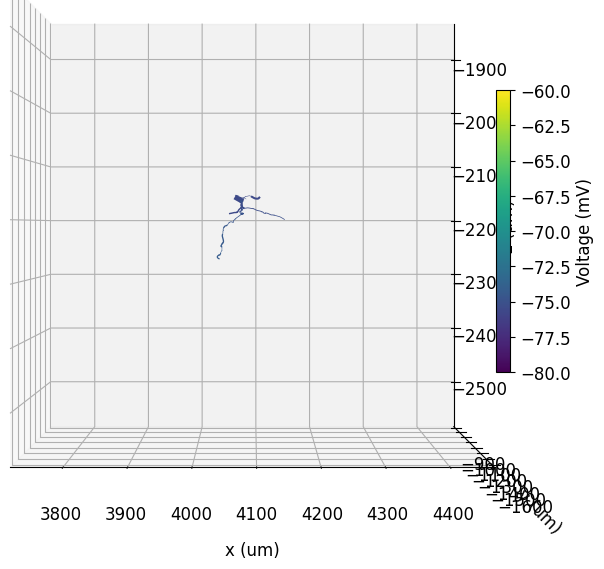

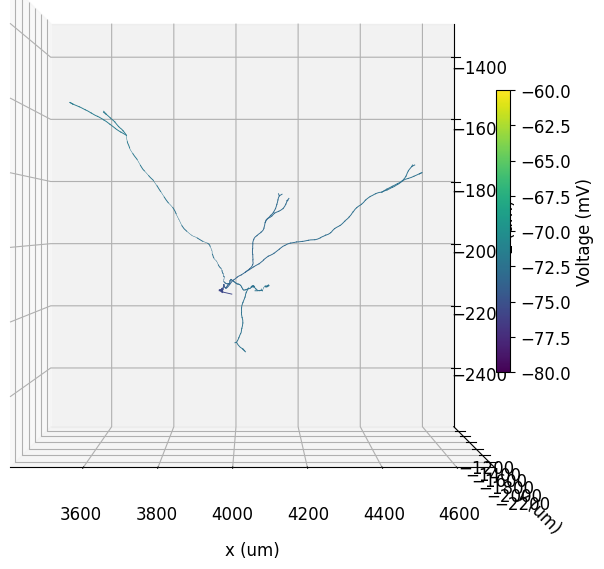

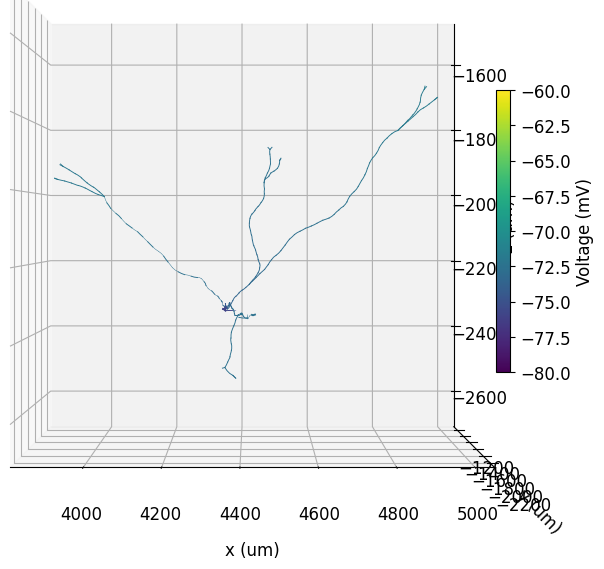

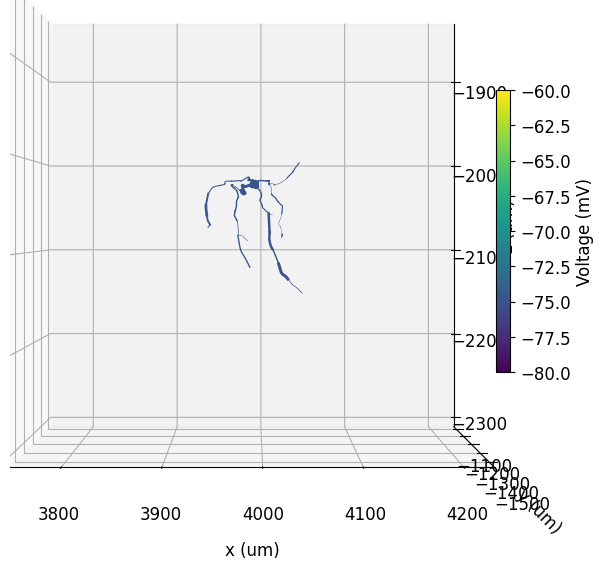

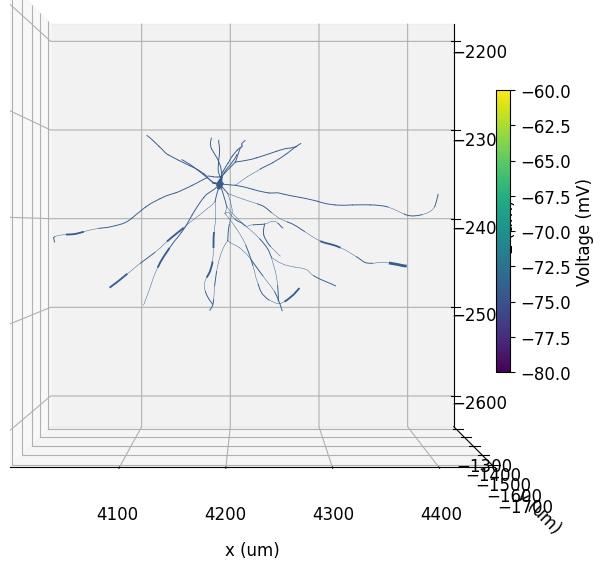

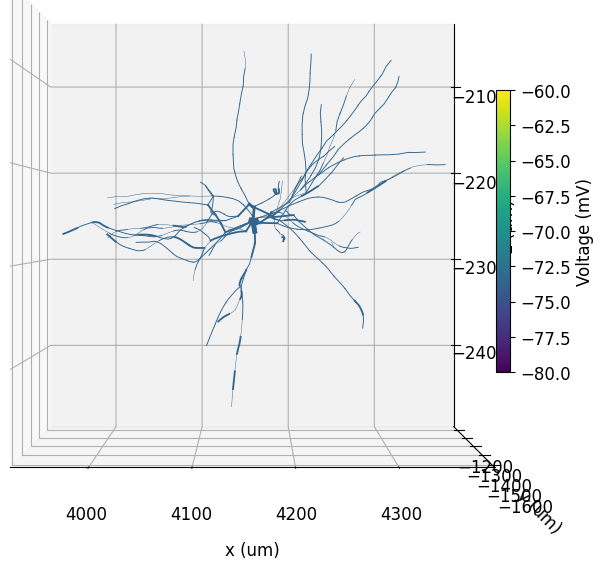

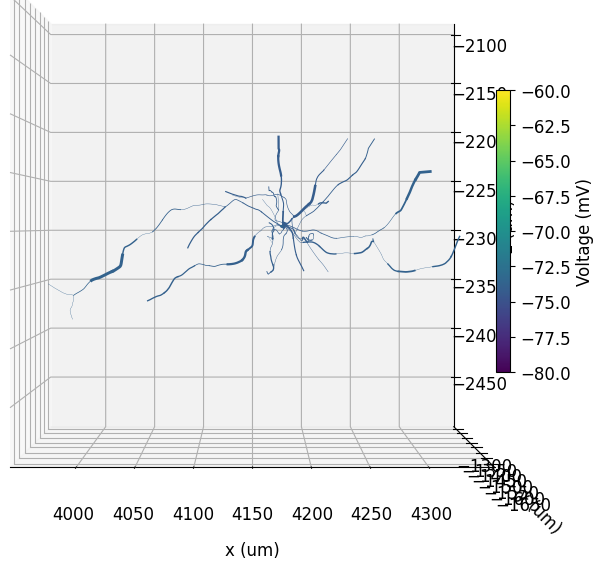

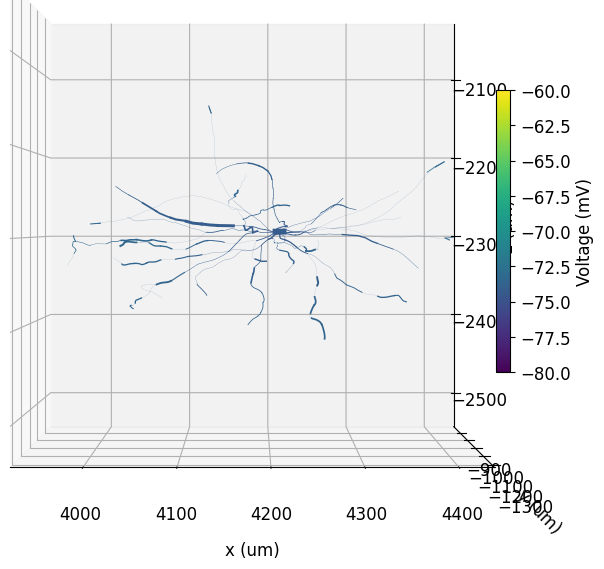

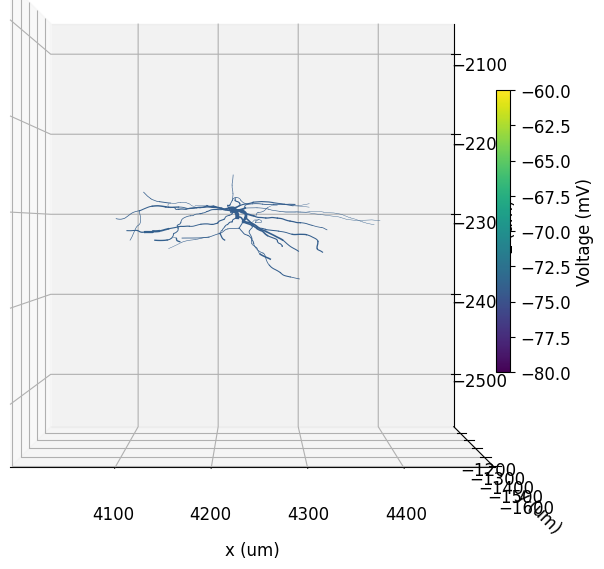

In [49]:
for ii in range(9):
        sim.analysis.plotShape(includePre= [ii], includePost= [ii], 
        includeAxon=True, showSyns=True, showElectrodes=False,
        cvar= 'voltage', dist=0.6, elev=0, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-80, -60], showFig=False, synSize=2, saveFig=True, figSize=(6,6))

In [46]:
for gid in sorted(cellName_list.keys()):
    for gid2 in sorted(cellName_list.keys()):

        var_list_a = ['@source_node', 'afferent_center_x', 'afferent_center_y', 'afferent_center_z', 'afferent_section_id', 'afferent_section_pos', 'afferent_section_type', 'afferent_segment_id', 
                    'afferent_segment_offset', 'afferent_surface_x', 'afferent_surface_y', 'afferent_surface_z', '@target_node', 'efferent_center_x', 'efferent_center_y', 'efferent_center_z', 
                    'efferent_section_id', 'efferent_section_pos', 'efferent_section_type', 'efferent_segment_id', 'efferent_segment_offset', 'efferent_surface_x', 'efferent_surface_y', 
                    'efferent_surface_z', 'spine_length', 'syn_property_rule', 'syn_type_id']
        # afferent edges of node_ids[gid2]
        sampled_edge_ids = conn.afferent_edges(gid2)    
        # var_list_a = sorted(conn.property_names)[0:12]    
        var_list_a =  ['@source_node', 'afferent_center_x', 'afferent_center_y', 'afferent_center_z', 
                    'afferent_section_pos', 'afferent_section_type', 'afferent_segment_id',
                    'afferent_section_id', 
                    'afferent_segment_offset',
                    # '@target_node', 'efferent_center_x', 'efferent_center_y', 'efferent_center_z', 
                    #   'efferent_section_id',     
                    #   'efferent_segment_offset', 
                    #   'spine_length', 'syn_property_rule', 'syn_type_id'
                    ]
        connsinfo = conn.get(sampled_edge_ids,var_list_a)

        if len(connsinfo.get(connsinfo['@source_node']==gid)) >= 1:
            print(gid,cellName_list[gid], cellName_list[gid2],gid2,len(connsinfo.get(connsinfo['@source_node']==gid)))
            # print(netParams.connParams[cellName_list[gid]+'->'+cellName_list[gid2]])

138220 L4_NBC_cNAC_S1F_1 L4_MC_cNAC_S1F_7 141803 1
138337 L4_NBC_cNAC_S1F_8 L4_MC_cNAC_S1F_7 141803 2
141757 L4_BTC_cNAC_S1F_6 L4_NBC_cNAC_S1F_1 138220 6
141757 L4_BTC_cNAC_S1F_6 L4_MC_cNAC_S1F_7 141803 2


In [47]:
gid = 138402
gid2 = 142232

var_list_a = ['@source_node', 'afferent_center_x', 'afferent_center_y', 'afferent_center_z', 'afferent_section_id', 'afferent_section_pos', 'afferent_section_type', 'afferent_segment_id', 
              'afferent_segment_offset', 'afferent_surface_x', 'afferent_surface_y', 'afferent_surface_z', '@target_node', 'efferent_center_x', 'efferent_center_y', 'efferent_center_z', 
              'efferent_section_id', 'efferent_section_pos', 'efferent_section_type', 'efferent_segment_id', 'efferent_segment_offset', 'efferent_surface_x', 'efferent_surface_y', 
              'efferent_surface_z', 'spine_length', 'syn_property_rule', 'syn_type_id']
# afferent edges of node_ids[gid2]
sampled_edge_ids = conn.afferent_edges(gid2)    
# var_list_a = sorted(conn.property_names)[0:12]    
var_list_a =  ['@source_node', 'afferent_center_x', 'afferent_center_y', 'afferent_center_z', 
               'afferent_section_pos', 'afferent_section_type', 'afferent_segment_id',
               'afferent_section_id', 
              'afferent_segment_offset',
              # '@target_node', 'efferent_center_x', 'efferent_center_y', 'efferent_center_z', 
            #   'efferent_section_id',     
            #   'efferent_segment_offset', 
            #   'spine_length', 'syn_property_rule', 'syn_type_id'
              ]
connsinfo = conn.get(sampled_edge_ids,var_list_a)
connsinfo.get(connsinfo['@source_node']==gid)

,@source_node,afferent_center_x,afferent_center_y,afferent_center_z,afferent_section_pos,afferent_section_type,afferent_segment_id,afferent_section_id,afferent_segment_offset
227477635,138402,4097.658203,-1278.120239,-2268.350098,0.0,1,0,0,0.0
227477636,138402,4097.658203,-1278.120239,-2268.350098,0.0,1,0,0,0.0
227477637,138402,4097.658203,-1278.120239,-2268.350098,0.0,1,0,0,0.0
227477638,138402,4097.658203,-1278.120239,-2268.350098,0.0,1,0,0,0.0


In [48]:
# print(np.array(preA) + np.array([3000.0, -2000.0, -3500.0]), np.array(postA) + np.array([3000.0, -2000.0, -3500.0]))
# cellName_list, netParams.cellParams['L2_TPC:B_cADpyr_S1F_0']['secs']['apic_20']['geom']
# cellName_list